In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#Exploring a more complex dataset
fraud = pd.read_csv('online_fraud.csv')
fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0


In [ ]:
#Display the general information of the dataset and try to answer the following questions
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [ ]:
fraud.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
# Run a descriptive analysis on numeric features (columns)
fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03,0.0
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00,0.0
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00,0.0
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00,0.0


In [ ]:
# Run a value_counts of all the
fraud.type.value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

In [ ]:
fraud.isFraud.value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

In [ ]:
#splitting the dataset into training and testing set
x = fraud.drop(['isFraud', 'nameOrig', 'nameDest'], axis = 1)
y = fraud.iloc[:,-2]

In [ ]:
x

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,0
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,0
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,479803.00,347245.65,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,90545.00,80627.64,0.00,0.00,0
1048572,95,PAYMENT,14140.05,20545.00,6404.95,0.00,0.00,0
1048573,95,PAYMENT,10020.05,90605.00,80584.95,0.00,0.00,0


In [ ]:
fraud.type.value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

In [ ]:
y

0          0
1          0
2          1
3          1
4          0
          ..
1048570    0
1048571    0
1048572    0
1048573    0
1048574    0
Name: isFraud, Length: 1048575, dtype: int64

In [ ]:
# Encoding categorical features using label encoder
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
x['type'] = lb.fit_transform(x['type'])

In [ ]:
x

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,3,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,3,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,4,181.00,181.00,0.00,0.00,0.00,0
3,1,1,181.00,181.00,0.00,21182.00,0.00,0
4,1,3,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...
1048570,95,1,132557.35,479803.00,347245.65,484329.37,616886.72,0
1048571,95,3,9917.36,90545.00,80627.64,0.00,0.00,0
1048572,95,3,14140.05,20545.00,6404.95,0.00,0.00,0
1048573,95,3,10020.05,90605.00,80584.95,0.00,0.00,0


In [ ]:
x.dtypes

step                int64
type                int32
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFlaggedFraud      int64
dtype: object

In [ ]:
y

0          0
1          0
2          1
3          1
4          0
          ..
1048570    0
1048571    0
1048572    0
1048573    0
1048574    0
Name: isFraud, Length: 1048575, dtype: int64

In [ ]:
#Removing outlier using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

x = mm.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [ ]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
model.score(x_test, y_test)

0.9996185299096393

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[209445,     46],
       [    34,    190]], dtype=int64)

<Axes: >

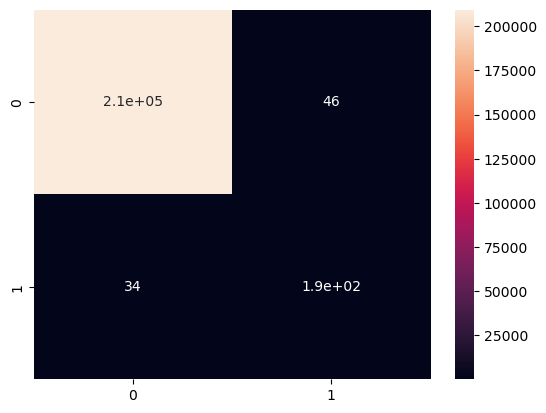

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.xlabel('Predicted')
plt.ylabel('Actual')
sns.heatmap(cm, annot = True)

In [ ]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209491
           1       0.81      0.85      0.83       224

    accuracy                           1.00    209715
   macro avg       0.90      0.92      0.91    209715
weighted avg       1.00      1.00      1.00    209715



In [ ]:
predictions = pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred})
predictions

,Actual Value,Predicted Value
781974,0,0
937737,0,0
907828,0,0
784628,0,0
662460,0,0
...,...,...
673443,0,0
656736,0,0
858501,0,0
617079,0,0


In [ ]:
from joblib import dump

dump(model, 'newonline_fraud.joblib')

['newonline_fraud.joblib']